In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('speichern2.csv')

In [23]:
import geopandas as gpd
import pandas as pd
filename = "20230125T1201__L2A__subset_saldi_06(1).gpkg"
gdf = gpd.read_file(filename)
'''
def classify_gedi(gdf):
    gdf_c = gdf.copy()
    gdf_c.loc[gdf["Relative Height bin98 (cm)"] <= 300, 'Relative Height bin98 (cm)'] = 300
    gdf_c.loc[(gdf["Relative Height bin98 (cm)"] > 300) & (gdf["Relative Height bin98 (cm)"] <= 600), 'Relative Height bin98 (cm)'] = 600
    gdf_c.loc[(gdf["Relative Height bin98 (cm)"] > 600) & (gdf["Relative Height bin98 (cm)"] <= 1000), 'Relative Height bin98 (cm)'] = 1000
    gdf_c.loc[gdf["Relative Height bin98 (cm)"] > 1000, 'Relative Height bin98 (cm)'] = 10000
    gdf = gdf_c.replace({'Relative Height bin98 (cm)' : {300 : '<3 m', 600 : '3 - 6 m', 1000 : '6 - 10 m', 10000 : '> 10 m'}})
    return gdf

gdf_recl = classify_gedi(gdf=gdf)
'''

def leaf_off_subset(gdf):
    gdf['Acquisition Time'] = pd.to_datetime(gdf['Acquisition Time'])
    gdf = gdf.loc[(gdf["Acquisition Time"].dt.month >= 6) & (gdf["Acquisition Time"].dt.month <= 9), :]
    return gdf

#gdf_recl_lo = leaf_off_subset(gdf=gdf)
gdf_lo = leaf_off_subset(gdf=gdf)

# Read the GeoJSON file as a GeoPandas DataFrame
clip_area = gpd.read_file('geo419b_aoi.geojson')

# Perform the clipping operation
gdf_lo = gpd.clip(gdf_lo, clip_area)

In [57]:
df['Höhe'] = gdf_lo['Relative Height bin98 (cm)'].reset_index(drop=True)
df

,min_vv,max_vv,mean_vv,median_vv,std_vv,05_vv,25_vv,75_vv,95_vv,min_vh,...,mean_rvi,median_rvi,std_rvi,05_rvi,25_rvi,75_rvi,95_rvi,Acquisition Time,Relative Height bin98 (cm),Höhe
0,0.029655,0.059328,0.044970,0.046899,0.009040,0.032193,0.039151,0.050303,0.056813,0.006371,...,0.676656,0.600958,0.258302,0.422554,0.536758,0.721173,1.111751,2020-08-23 12:53:42,3 - 6 m,367.0
1,0.038104,0.071502,0.055315,0.054353,0.009468,0.041948,0.052576,0.059046,0.068714,0.004549,...,0.529685,0.534081,0.157914,0.302961,0.420416,0.660765,0.725187,2020-08-23 12:53:42,<3 m,284.0
2,0.034223,0.054973,0.047080,0.050770,0.008278,0.034575,0.040628,0.054168,0.054741,0.008356,...,0.787898,0.786650,0.150484,0.583732,0.699420,0.879700,0.994118,2020-08-23 12:53:42,<3 m,299.0
3,0.043288,0.090475,0.063751,0.063856,0.014111,0.045874,0.054512,0.069808,0.084659,0.009802,...,0.679501,0.646785,0.171063,0.442673,0.564667,0.859411,0.861974,2020-08-23 12:53:42,<3 m,299.0
4,0.023024,0.046503,0.035872,0.035242,0.006792,0.026050,0.033723,0.039445,0.045019,0.004023,...,0.725447,0.693434,0.196822,0.535375,0.576309,0.783538,1.050500,2020-08-23 12:53:42,3 - 6 m,385.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21224,0.054460,0.100460,0.087838,0.094188,0.015789,0.060601,0.084372,0.098506,0.100117,0.019543,...,0.938948,0.880552,0.224253,0.678572,0.781656,1.085685,1.278407,2019-09-28 23:17:24,6 - 10 m,827.0
21225,0.065006,0.099293,0.085376,0.090597,0.012253,0.066753,0.076681,0.094688,0.098906,0.011059,...,0.758615,0.809306,0.208448,0.442282,0.646127,0.865894,1.021243,2019-09-28 23:17:24,6 - 10 m,651.0
21226,0.081991,0.121187,0.100127,0.094899,0.014419,0.083593,0.088640,0.112766,0.120419,0.015042,...,0.788234,0.843463,0.165804,0.578170,0.626849,0.919048,0.997524,2019-09-28 23:17:24,3 - 6 m,449.0
21227,0.068409,0.100264,0.084457,0.083878,0.010896,0.069835,0.075882,0.093441,0.098261,0.017673,...,0.788931,0.716909,0.134308,0.651166,0.675925,0.891592,0.984590,2019-09-28 23:17:24,3 - 6 m,370.0


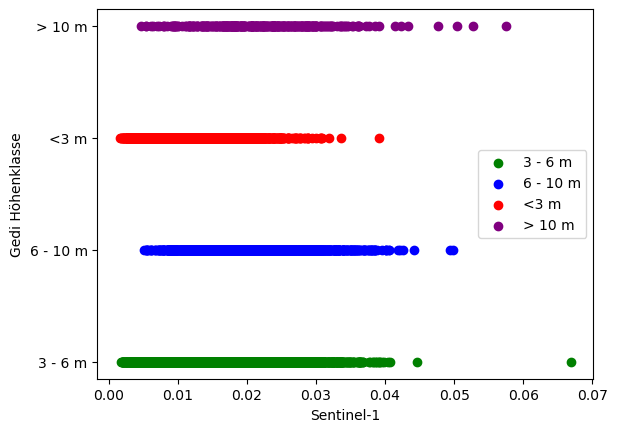

In [22]:
# Farbzuordnung für Klassen
colors = {'<3 m': 'red', '3 - 6 m': 'green', '6 - 10 m': 'blue', '> 10 m': 'purple'}

# Scatterplot erstellen
for height_class, group in df.groupby('Relative Height bin98 (cm)'):
    plt.scatter(group['median_vh'], [height_class] * len(group), c=colors[height_class], label=height_class)

# Achsentitel
plt.xlabel('Sentinel-1')
plt.ylabel('Gedi Höhenklasse')

# Legende hinzufügen
plt.legend()

# Diagramm anzeigen
plt.show()



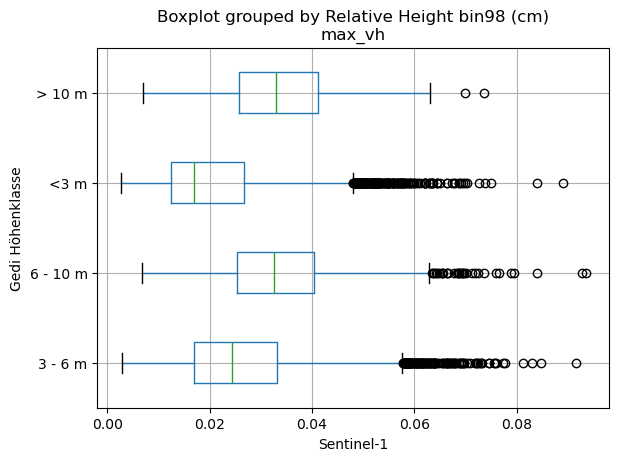

In [21]:
df.boxplot(column='max_vh', by='Relative Height bin98 (cm)', vert=False)

# Achsentitel
plt.xlabel('Sentinel-1')
plt.ylabel('Gedi Höhenklasse')

# Diagramm anzeigen
plt.show()

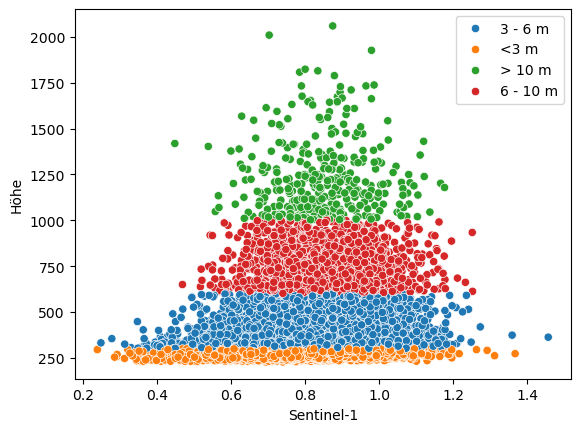

In [54]:
#df.plot(x='mean_vh', y='Höhe', kind='scatter')
import seaborn as sns

# Scatterplot erstellen mit Farbgruppierung nach 'Height_Classified'
sns.scatterplot(data=df, x='mean_rvi', y='Höhe', hue='Relative Height bin98 (cm)')

# Achsentitel
plt.xlabel('Sentinel-1')
plt.ylabel('Höhe')

# Legende hinzufügen
plt.legend()

# Diagramm anzeigen
plt.show()


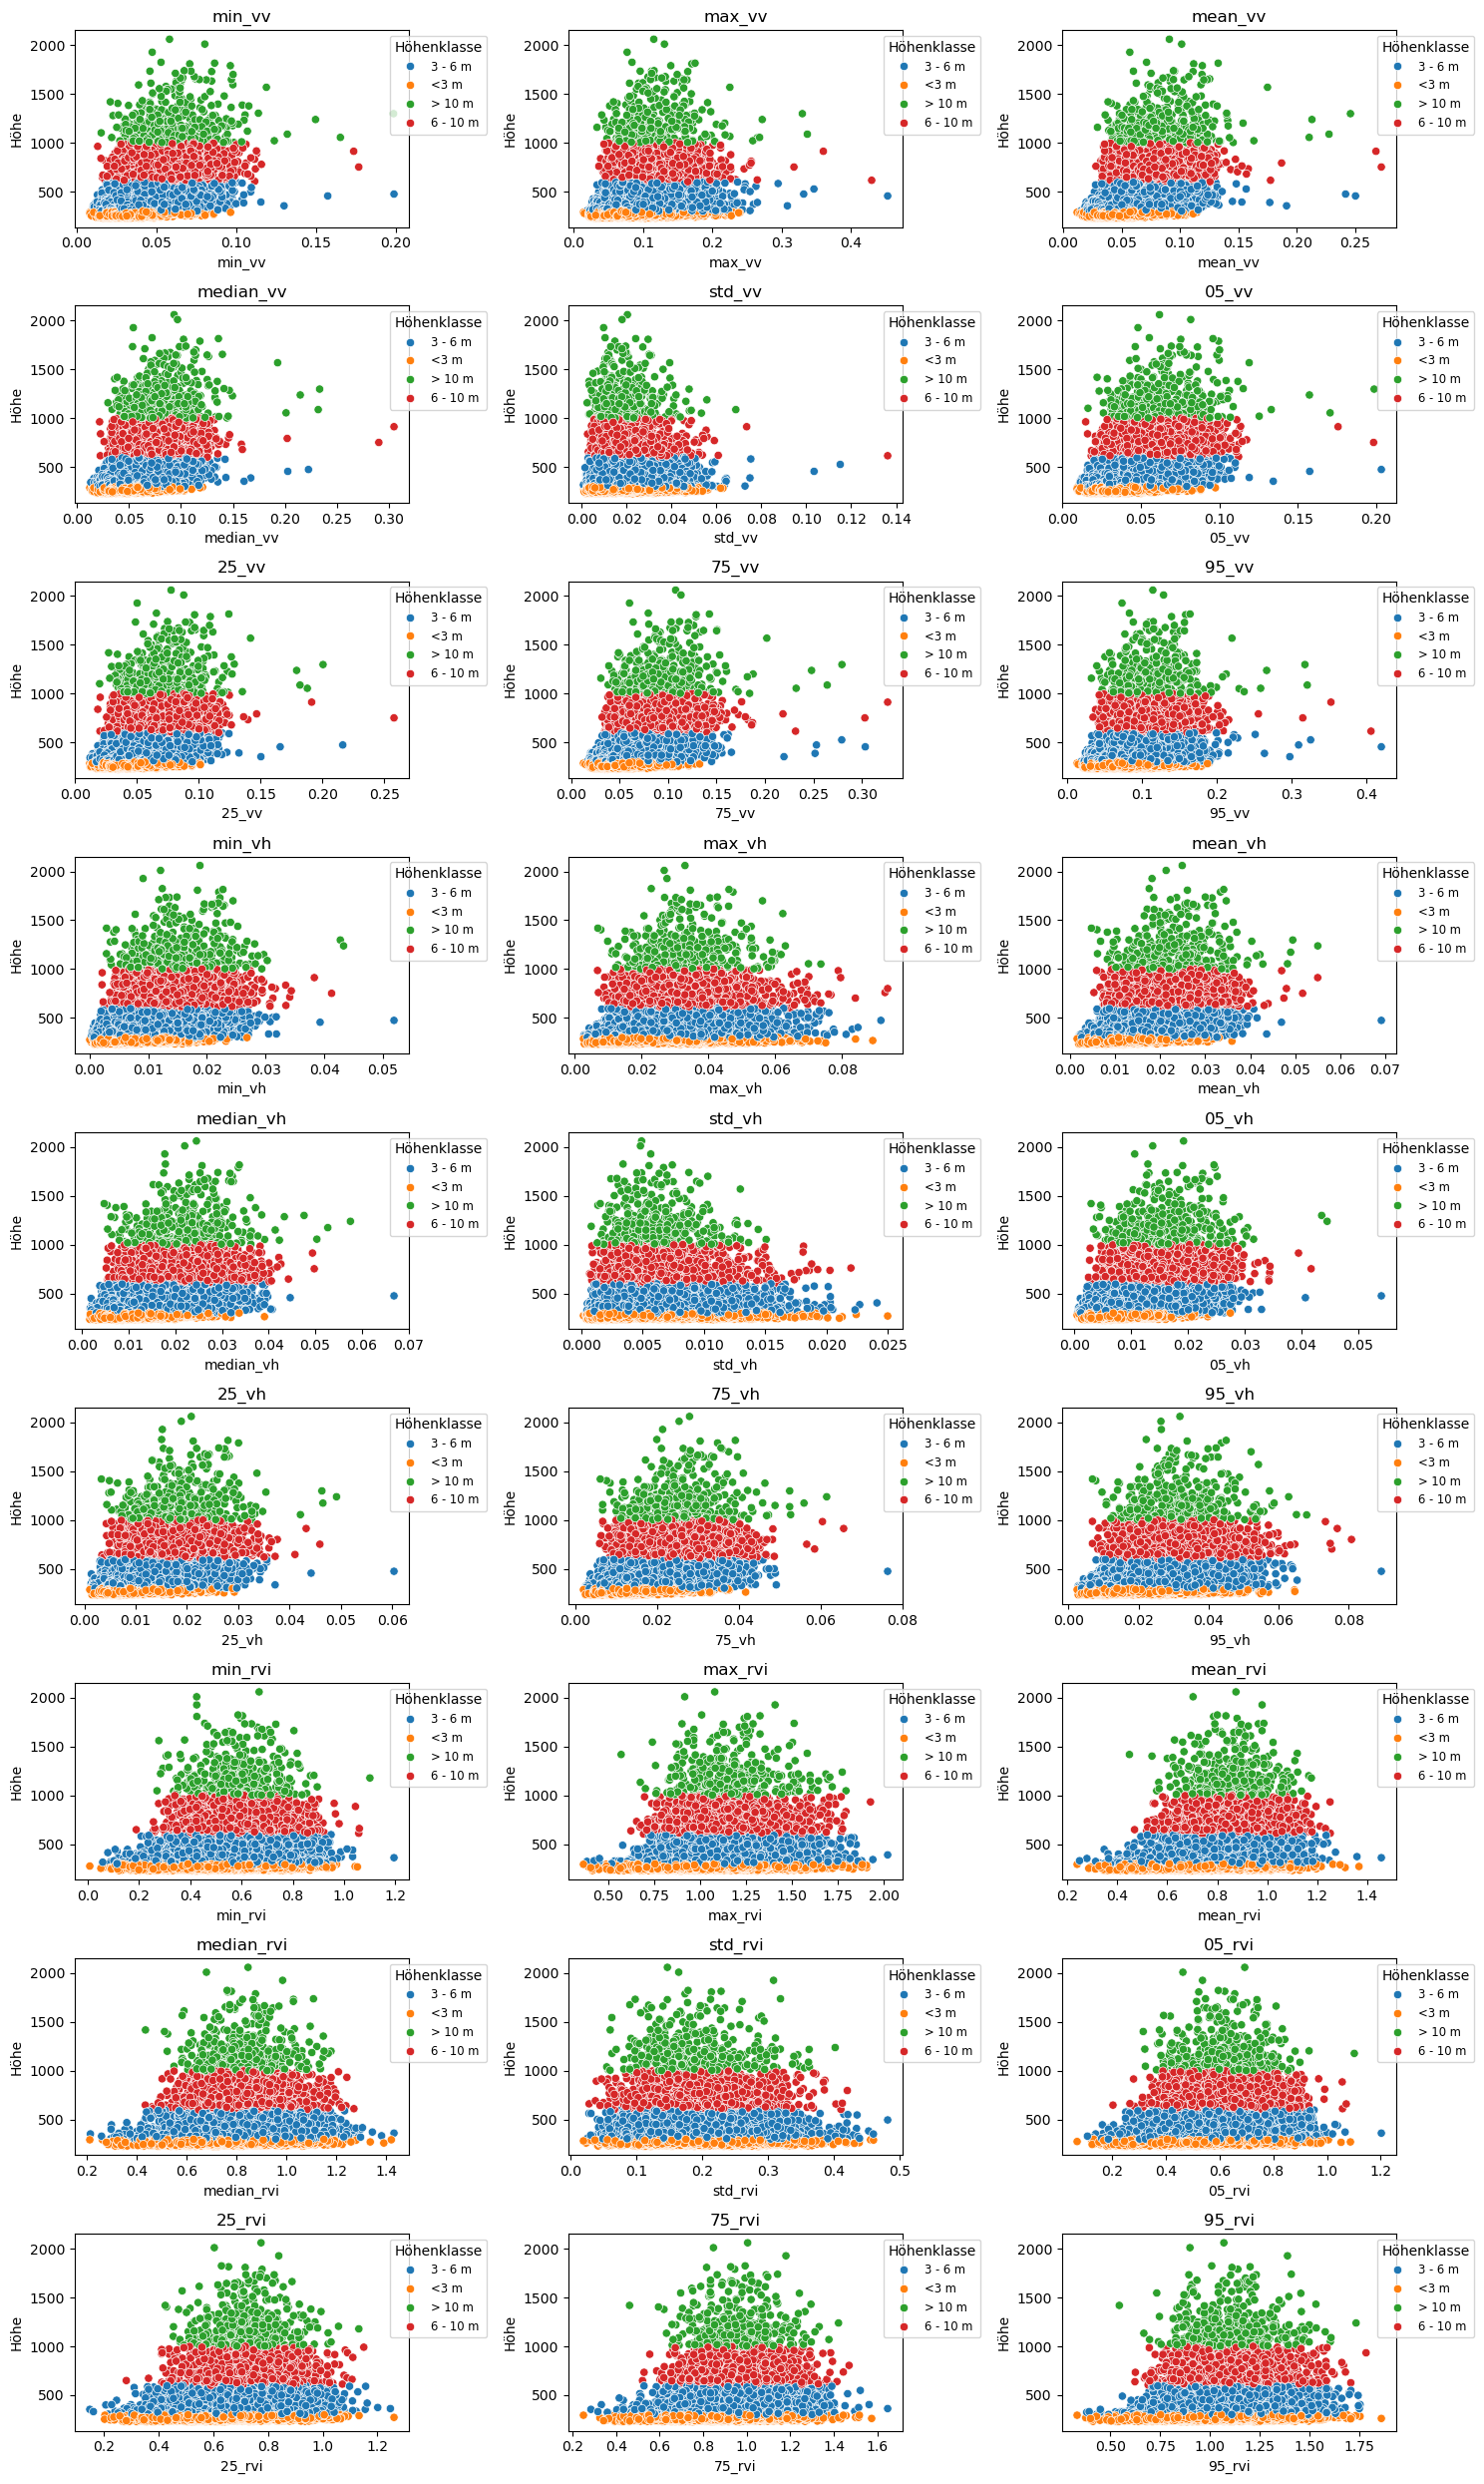

In [60]:
# Definiere die Anzahl der Zeilen und Spalten im Raster
n_rows = 9
n_cols = 3

# Erstelle das Raster von Subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 25))

# Flatten der 2D-Achsen-Array in 1D für einfachen Zugriff
axes = axes.flatten()

# Plotten jedes Features auf seiner eigenen Achse
for i, feature in enumerate(df.columns[:-3]):
    sns.scatterplot(data=df, x=feature, y='Höhe', hue='Relative Height bin98 (cm)', ax=axes[i])
    axes[i].set_title(feature)
    axes[i].legend(loc='upper right', bbox_to_anchor=(1.25, 1), title='Höhenklasse', fontsize='small')

# Layout anpassen
plt.tight_layout()
plt.savefig('scatterplots.png')
plt.show()